<a href="https://colab.research.google.com/github/Petek1010/ML_MINST/blob/master/KerasAndTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operating with tensors in TensorFlow

In [8]:
import tensorflow as tf

x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


`tf.ones(shape = (2,1))` is equivalent to `np.ones(shape=(2,1))`

How to update tensor, with new values:

In [10]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,3)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.15687378, -2.2486928 , -0.14686143],
       [ 0.48487598,  0.3152309 ,  1.8660793 ],
       [-0.270596  ,  0.13947172, -0.33475873]], dtype=float32)>


In [12]:
v[1,1].assign([3])
print(v)


<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.15687378, -2.2486928 , -0.14686143],
       [ 0.48487598,  3.        ,  1.8660793 ],
       [-0.270596  ,  0.13947172, -0.33475873]], dtype=float32)>


In [15]:
a = tf.Variable(initial_value=tf.random.normal(shape=(2,2)))
b = tf.Variable(initial_value=tf.random.normal(shape=(2,2)))

e = tf.matmul(a,b)
print('a = ',a, 'b = ',b,'e = ',e)

a =  <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.2798041 , -0.40780962],
       [-0.16488308, -0.41203988]], dtype=float32)> b =  <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.3477884, -0.8714195],
       [ 1.3582265, -1.243673 ]], dtype=float32)> e =  tf.Tensor(
[[-0.6512105   0.26335508]
 [-0.5022991   0.6561252 ]], shape=(2, 2), dtype=float32)


Using `GradientTape`

In [20]:
input_var = tf.Variable(initial_value=3)
print('Input variable is: ', input_var)

with tf.GradientTape() as tape:
  result = tf.square(input_var)
  print('Result: ', result)

gradient = tape.gradient(result, input_var)

print('Gradient is: ', gradient)


Input variable is:  <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>
Result:  tf.Tensor(9, shape=(), dtype=int32)
Gradient is:  None


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

# Implementation of linear classifier from scratch

We'll generate two classes of points from a random distribution, with a specific **covariance matrix** (shape of cloud of points) and a **specific mean** (position of the cloud on the plane). We will use the same covariance matrix but different mean values:

In [65]:
import numpy as np
import matplotlib.pyplot as plt

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class

)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

Now we generate corresponding **target labels**, an array of zeroes and ones, stacked on each other (1000 ones on top of 1000 zeros)

In [66]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                    np.ones((num_samples_per_class, 1), dtype="float32")))



Plotting our data:

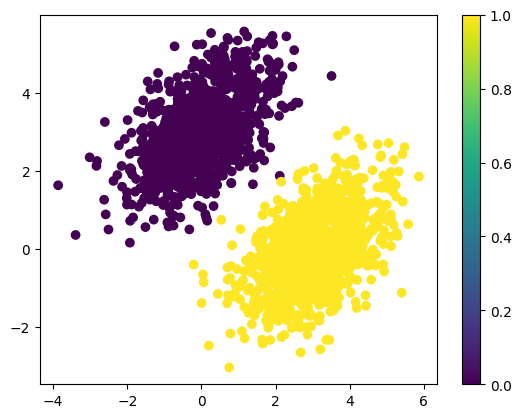

In [67]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.colorbar()
plt.show()

Now we create a linear classifier that can learn to seperate these two clouds of dots. A linear classificator is an affine transformation `prediction = W ⋅ input + b`, trained to minimize the square of the ddifference between predictions and the targets.

In [68]:
input_dim = 2 # 2D points
output_dim = 1 # a single score; eather close to 0 or to 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(output_dim))

Forward pass function (`W ⋅ input + b`):

In [69]:
def model(inputs):
  return tf.matmul(inputs, W) + b

Loss function:

In [70]:
def square_loss(targets, predictions):
  # tensor containing per sample losses
  per_sample_losses = tf.square(targets - predictions)
  # Average scores into a single scalar
  return tf.reduce_mean(per_sample_losses)

Training step function:

In [71]:
#learning_rate = 0.1

def training_step(inputs, targets, learning_rate=0.1):
  with tf.GradientTape() as tape:
    predictions = model(inputs) # Forwrd pass inside a gradient scope
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  # Update weights:
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

The batch training loop:

In [72]:
  loss_array = []

  for step in range(40):
    loss = training_step(inputs,targets)
    loss_array.append(loss)
    # print(f"Loss at the step {step}: {loss:.4f}")


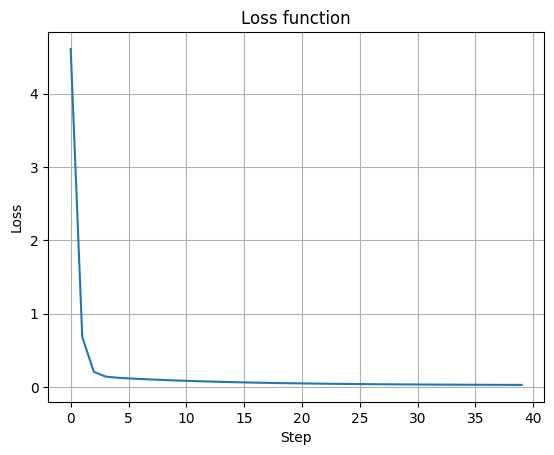

In [76]:
plt.plot(loss_array)
plt.title('Loss function')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

Because our targets are zeros and ones, a given input point will be classified as “0” if its prediction value is below 0.5, and as “1” if it is above 0.5. We can plot the prediction line, since we are in 2D plane: `w1 * x + w2 * y + b = 0.5`  Plot of classified training data points:

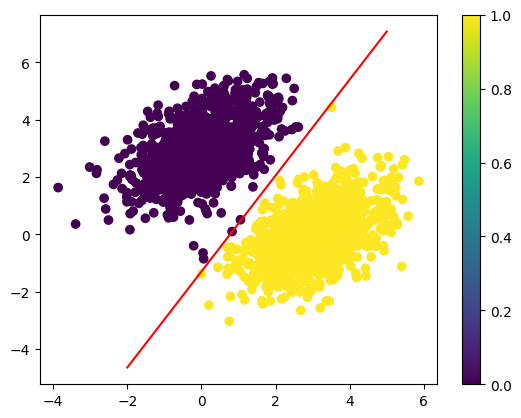

In [74]:
predictions = model(inputs)

x = np.linspace(-2, 5, 100)
line = (0.5 - b - (W[0]*x))/W[1]


plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.plot(x, line, 'r')
plt.colorbar()
plt.show()